In [ ]:
!pip install -q kagglehub pandas scikit-learn matplotlib

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset (1).csv


In [ ]:
df = pd.read_csv('Salary_dataset.csv')

In [ ]:
print("Dataset carregado")
print(df.head(10))

Dataset carregado
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
5           5              3.0  56643.0
6           6              3.1  60151.0
7           7              3.3  54446.0
8           8              3.3  64446.0
9           9              3.8  57190.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


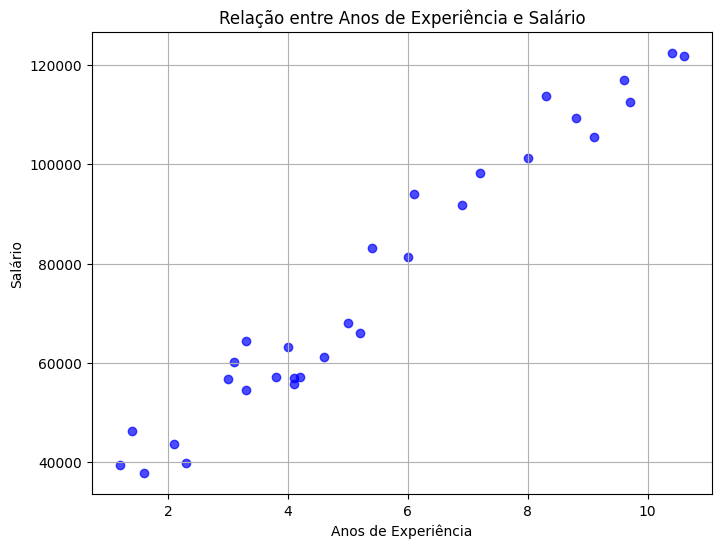

In [ ]:
# Gráfico: anos de experiência vs aalário
plt.figure(figsize=(8,6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', alpha=0.7)
plt.title('Relação entre Anos de Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

In [ ]:
#separando variáveis

# X = Variável independente (anos de xp)
# y - variável dependente (salário)

X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
#dividindo entre teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#criando e treinando o modelo

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#fazendo previsões

y_pred = modelo.predict(X_test)

In [ ]:
#avaliando o modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


coeficiente = modelo.coef_.flatten()[0]
intercepto = np.squeeze(modelo.intercept_)

print("📈 Resultados do Modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")
print(f"Coeficiente angular (a): {coeficiente:.2f}")
print(f"Intercepto (b): {intercepto:.2f}\n")


📈 Resultados do Modelo:
Erro Quadrático Médio (MSE): 49830096.86
Coeficiente de Determinação (R²): 0.90
Coeficiente angular (a): 9423.82
Intercepto (b): 24380.20



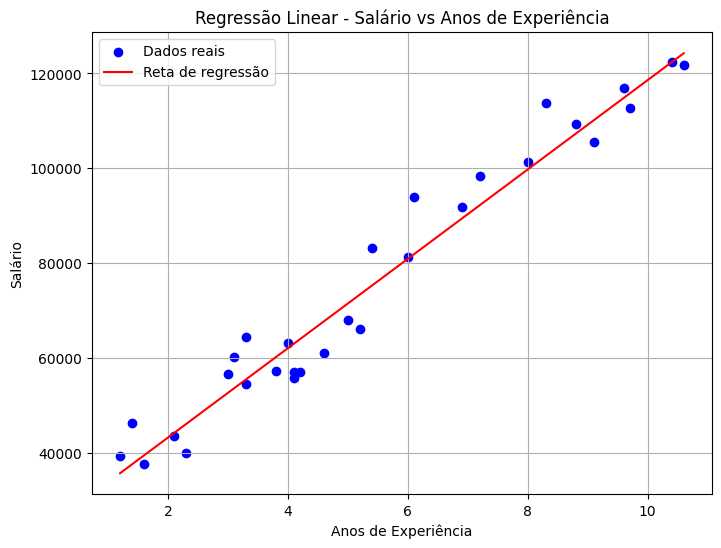

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
plt.title('Regressão Linear - Salário vs Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Previsão para novos valores
anos_novos = np.array([[5], [8], [12]])
salarios_previstos = modelo.predict(anos_novos)

for anos, salario in zip(anos_novos.flatten(), salarios_previstos):
    print(f"Para um trabalhador de {anos} anos de experiência, temos um salário estimado em : R$ {salario:,.2f}")

Para um trabalhador de 5 anos de experiência, temos um salário estimado em : R$ 71,499.28
Para um trabalhador de 8 anos de experiência, temos um salário estimado em : R$ 99,770.72
Para um trabalhador de 12 anos de experiência, temos um salário estimado em : R$ 137,465.99


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("""
Conclusão:
O modelo de Regressão Linear apresentou um bom ajuste (R² ≈ {:.2f}),
indicando que a variável 'Anos de Experiência' explica bem a variação dos salários.
""".format(r2))


Conclusão:
O modelo de Regressão Linear apresentou um bom ajuste (R² ≈ 0.90),
indicando que a variável 'Anos de Experiência' explica bem a variação dos salários.

